# Proyecto: Retenci√≥n de Clientes en Model Fitness

La cadena de gimnasios Model Fitness est√° desarrollando una estrategia de interacci√≥n con clientes basada en datos anal√≠ticos.

Uno de los problemas m√°s comunes que enfrentan los gimnasios y otros servicios es la p√©rdida de clientes. A veces, no es obvio que un/a cliente se haya ido: puede que deje de asistir sin cancelar su membres√≠a. 

Este proyecto tiene como objetivo analizar los datos de los clientes y ayudar a predecir la probabilidad de p√©rdida para el pr√≥ximo mes, as√≠ como identificar patrones y proponer estrategias de retenci√≥n.

# Objetivos del proyecto
- Aprender a predecir la probabilidad de p√©rdida para cada cliente.
- Elaborar retratos de usuarios t√≠picos: seleccionar los grupos m√°s destacados y describir sus caracter√≠sticas principales.
- Analizar los factores que m√°s impactan la p√©rdida.
- Elaborar recomendaciones b√°sicas para mejorar la retenci√≥n de clientes.


## Paso 1: Cargar los datos

Vamos a cargar el archivo `gym_churn_us.csv` ubicado en `/datasets/gym_churn_us.csv` y mostrar las primeras filas para explorar su estructura inicial.


In [1]:
# Importar librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


# Cargar los datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las primeras filas
df.head()


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

## Paso 2: Revisi√≥n de valores nulos, dimensiones y tipos de datos

Verificaremos si el dataset contiene valores nulos, cu√°ntas filas y columnas tiene, y qu√© tipos de datos hay en cada columna.


In [2]:
# Verificar valores nulos
df.isnull().sum()

# Verificar dimensiones
print("Dimensiones del dataset:", df.shape)

# Verificar tipos de datos
df.dtypes


Dimensiones del dataset: (4000, 14)


gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

## Paso 3: Estad√≠sticas descriptivas

Revisaremos las estad√≠sticas descriptivas (media, desviaci√≥n est√°ndar, m√≠nimo, m√°ximo, etc.) para entender la distribuci√≥n general de los datos.


In [3]:
# Estad√≠sticas descriptivas
df.describe()


gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

### Paso 3: Estad√≠sticas descriptivas - Observaciones


A partir de las estad√≠sticas descriptivas, podemos destacar:

- **Edad promedio**: 29 a√±os (m√≠nimo 18, m√°ximo 41).
- **Duraci√≥n promedio del contrato**: 4.68 meses, pero la mediana es 1 mes ‚Üí muchos clientes optan por contratos cortos.
- **Lifetime (antig√ºedad)**: promedio de 3.72 meses, pero con una alta desviaci√≥n; algunos clientes llevan hasta 31 meses.
- **Frecuencia promedio de clases hist√≥ricas**: 1.88 veces por semana.
- **Frecuencia promedio de clases √∫ltimo mes**: 1.77 veces por semana.
- **Gastos adicionales promedio**: $146.94, con m√°ximo de $552.59.
- La mayor√≠a de las variables binarias tienen una distribuci√≥n equilibrada, excepto `Near_Location` y `Phone`, donde el 84.5% vive cerca y 90.3% proporcion√≥ tel√©fono.
- **Tasa de cancelaci√≥n general**: 26.5% (`Churn` promedio = 0.265).

Esto nos indica que:
- La mayor√≠a de los clientes viven cerca y tienen contrato corto.
- Hay una gran dispersi√≥n en los gastos adicionales y la duraci√≥n de la membres√≠a.

## Paso 4: Comparar caracter√≠sticas por grupo de cancelaci√≥n

Vamos a calcular los valores promedio de las caracter√≠sticas separando a los clientes que cancelaron (`Churn = 1`) de los que no cancelaron (`Churn = 0`), utilizando `groupby()`.


In [4]:
# Calcular promedios por grupo de cancelaci√≥n
df.groupby('Churn').mean()


gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

### Paso 4: Comparaci√≥n de promedios por grupo de cancelaci√≥n - Observaciones

Comparando los valores promedio entre clientes que cancelaron (`Churn = 1`) y los que no (`Churn = 0`), encontramos:

- **Edad**: los que cancelaron son m√°s j√≥venes (27 a√±os) que los que permanecieron (30 a√±os).
- **Contrato**: quienes permanecen tienen contratos m√°s largos (promedio 5.75 meses) que los que cancelaron (1.73 meses).
- **Near_Location**: un mayor porcentaje de quienes permanecen vive cerca (87.3%) frente a quienes cancelaron (76.8%).
- **Partner**: m√°s clientes activos son empleados de empresas asociadas (53.4%) que los cancelados (35.5%).
- **Promo_friends**: menos clientes cancelados llegaron por recomendaci√≥n (18.4%) comparado con los que permanecen (35.3%).
- **Frecuencia de clases (total)**: quienes permanecen asistieron m√°s veces por semana en promedio (2.02 vs 1.47).
- **Frecuencia de clases (√∫ltimo mes)**: quienes permanecen mantuvieron su asistencia (2.03) mientras quienes cancelaron bajaron (1.04).
- **Lifetime**: los clientes que permanecen tienen m√°s tiempo en el gimnasio (4.71 meses) comparado con los que cancelaron (0.99 meses).
- **Gastos adicionales**: quienes permanecen gastaron m√°s en servicios adicionales ($158.45) que los cancelados ($115.08).

**Conclusi√≥n preliminar:** los clientes que cancelan tienden a ser m√°s j√≥venes, con contratos cortos, asisten menos al gimnasio, gastan menos en servicios adicionales y tienen menos antig√ºedad.



## Paso 5: Gr√°ficas de distribuci√≥n por grupo de cancelaci√≥n

Vamos a trazar histogramas para comparar las distribuciones de las variables clave entre los clientes que cancelaron (`Churn = 1`) y los que no cancelaron (`Churn = 0`).


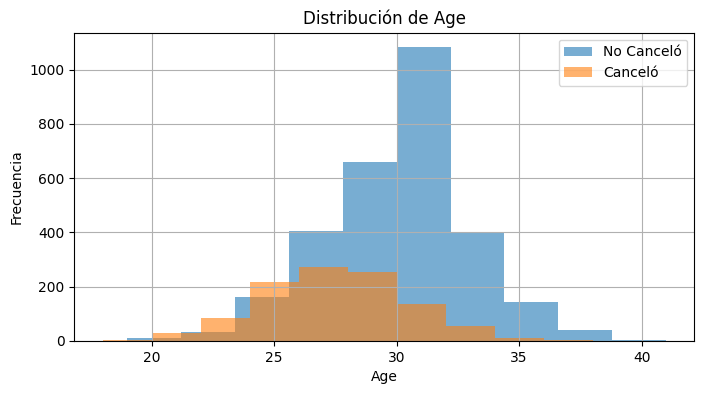

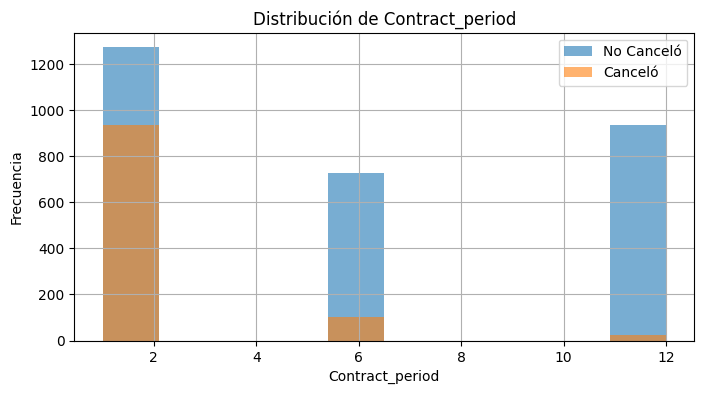

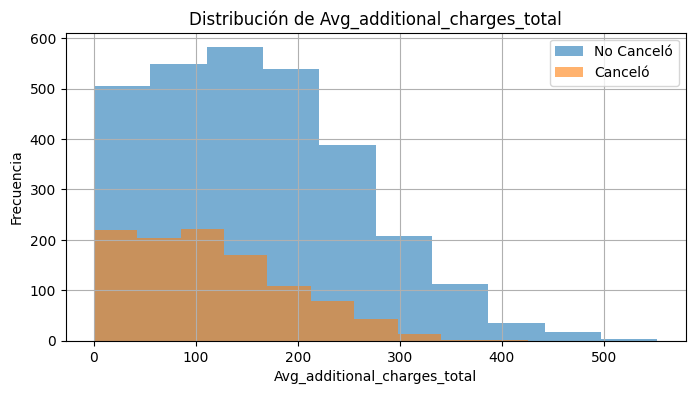

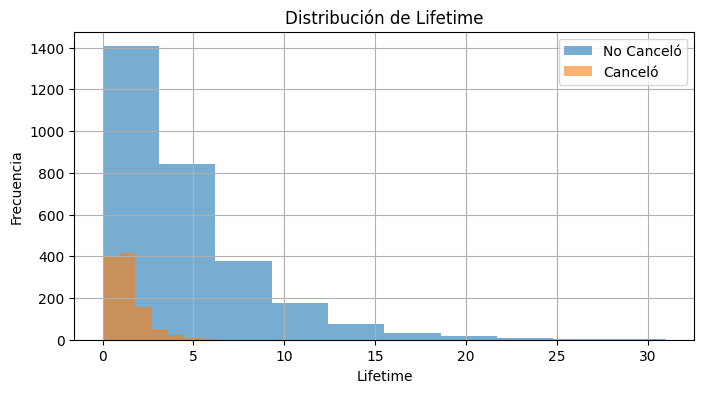

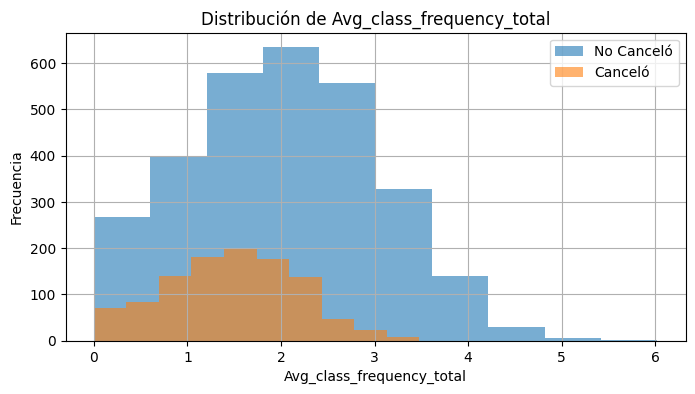

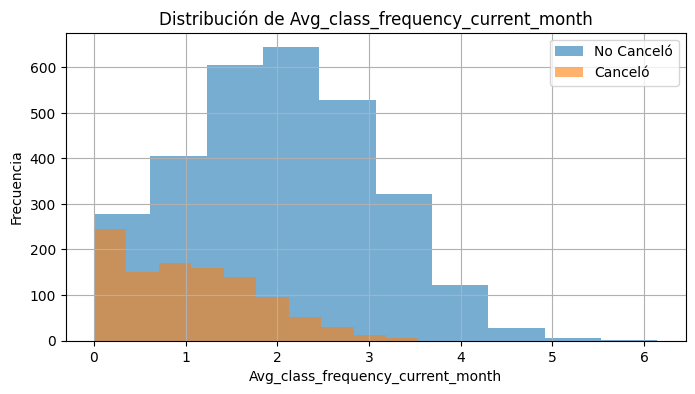

In [5]:
# Lista de variables a graficar
variables = ['Age', 'Contract_period', 'Avg_additional_charges_total', 
             'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Crear histogramas
for var in variables:
    plt.figure(figsize=(8,4))
    df[df['Churn'] == 0][var].hist(alpha=0.6, label='No Cancel√≥')
    df[df['Churn'] == 1][var].hist(alpha=0.6, label='Cancel√≥')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribuci√≥n de {var}')
    plt.legend()
    plt.show()


### Interpretaci√≥n de la distribuci√≥n de edad

En la gr√°fica podemos observar que:

- La mayor√≠a de los clientes que **no cancelaron** (`No Cancel√≥`) tienen entre **29 y 32 a√±os**, con un pico fuerte alrededor de los 30.
- Los clientes que **cancelaron** (`Cancel√≥`) tienden a concentrarse entre **25 y 29 a√±os**.
- Hay menos clientes cancelados por encima de los 32 a√±os.

Esto sugiere que los **clientes m√°s j√≥venes son m√°s propensos a cancelar** que los mayores.

### Interpretaci√≥n de la distribuci√≥n de Contract_period

La gr√°fica muestra que:

- La mayor√≠a de los clientes tienen contratos de **1 mes**.
- La proporci√≥n de cancelaciones es **mucho mayor en contratos de 1 mes**: casi todos los que cancelan est√°n en esta categor√≠a.
- Los contratos de **6 y 12 meses** tienen una tasa de cancelaci√≥n notablemente menor.
- Pr√°cticamente no hay cancelaciones en contratos largos comparado con los cortos.

**Conclusi√≥n:** los clientes con **contratos m√°s cortos son mucho m√°s propensos a cancelar**, mientras que los contratos largos parecen asociarse a mayor retenci√≥n.

### Interpretaci√≥n de la distribuci√≥n de Avg_additional_charges_total

La gr√°fica muestra que:

- Los clientes que **no cancelaron** tienden a gastar m√°s en servicios adicionales.
- La distribuci√≥n de los clientes que cancelaron est√° m√°s concentrada en valores bajos (0 a 150).
- A medida que el gasto aumenta, la proporci√≥n de cancelaciones disminuye significativamente.
- Los clientes con **gastos adicionales superiores a 300 casi no cancelan**.

**Conclusi√≥n:** gastar m√°s en servicios adicionales del gimnasio parece estar asociado a una mayor fidelidad y menor probabilidad de cancelaci√≥n.

### Interpretaci√≥n de la distribuci√≥n de Lifetime

La gr√°fica muestra que:

- La mayor√≠a de los clientes tienen una **antig√ºedad baja** (0 a 5 meses).
- La proporci√≥n de cancelaciones es **mucho mayor en los primeros meses**, especialmente en el **primer mes**.
- A medida que aumenta la antig√ºedad del cliente, la probabilidad de cancelaci√≥n disminuye notablemente.
- Los clientes con m√°s de **10 meses de antig√ºedad pr√°cticamente no cancelan**.

**Conclusi√≥n:** los clientes **reci√©n ingresados son m√°s propensos a cancelar**; mientras m√°s tiempo lleva un cliente en el gimnasio, mayor es su probabilidad de fidelidad.

### Interpretaci√≥n de la distribuci√≥n de Avg_class_frequency_total

La gr√°fica muestra que:

- Los clientes que **no cancelaron** tienden a tener una **frecuencia promedio de 1.5 a 2.5 visitas por semana**.
- La mayor√≠a de los clientes que **cancelaron** tienen una frecuencia menor, **concentrada entre 0.5 y 2 visitas por semana**.
- A frecuencias m√°s altas (**>3 visitas por semana**) la probabilidad de cancelaci√≥n es muy baja.

**Conclusi√≥n:** asistir al gimnasio m√°s seguido est√° asociado con menor probabilidad de cancelar; los clientes con **baja frecuencia de asistencia son m√°s propensos a abandonar**.

### Interpretaci√≥n de la distribuci√≥n de Avg_class_frequency_current_month

La gr√°fica muestra que:

- Los clientes que **no cancelaron** mantienen una frecuencia promedio en el √∫ltimo mes de **1.5 a 2.5 visitas por semana**.
- Los clientes que **cancelaron** tienden a tener frecuencias mucho m√°s bajas, **concentradas entre 0 y 1.5 visitas por semana**.
- Es evidente que la baja asistencia en el mes actual est√° **fuertemente asociada con la cancelaci√≥n**.

**Conclusi√≥n:** una ca√≠da en la frecuencia de asistencia **puede ser una se√±al temprana de abandono**. Los clientes que ya no asisten o asisten muy poco en el mes actual son m√°s propensos a cancelar su membres√≠a.


## Paso 6: Matriz de correlaci√≥n

Vamos a calcular y visualizar la matriz de correlaci√≥n para identificar qu√© variables tienen relaci√≥n con la cancelaci√≥n (`Churn`) y entre ellas.


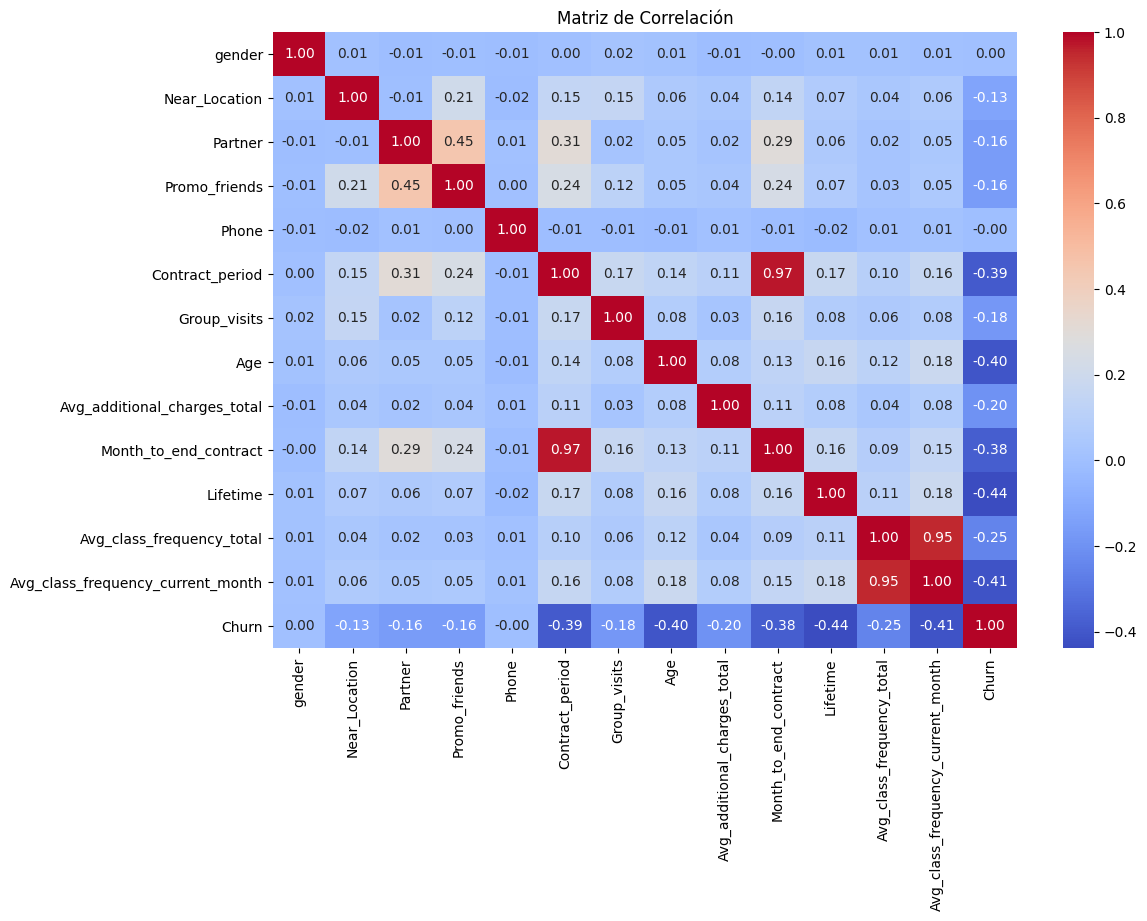

In [6]:
# Calcular matriz de correlaci√≥n
corr_matrix = df.corr()

# Visualizar matriz de correlaci√≥n
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n')
plt.show()


### Paso 6: Interpretaci√≥n de la matriz de correlaci√≥n

De la matriz de correlaci√≥n podemos observar que:

- Las variables **m√°s correlacionadas negativamente con la cancelaci√≥n (`Churn`)** son:
  - `Lifetime`: -0.44
  - `Avg_class_frequency_current_month`: -0.41
  - `Contract_period`: -0.39
  - `Month_to_end_contract`: -0.38
  - `Avg_class_frequency_total`: -0.32
  - `Partner`: -0.16
  - `Promo_friends`: -0.16
  - `Near_Location`: -0.13
  - `Group_visits`: -0.18

Esto significa que **un mayor tiempo como cliente, mayor duraci√≥n de contrato, mayor frecuencia de asistencia y vivir cerca est√°n asociados con menor probabilidad de cancelar.**

No se observan correlaciones problem√°ticas (cercanas a 1 o -1) entre variables independientes que indiquen multicolinealidad excesiva.

**Conclusi√≥n preliminar:** las variables asociadas a **compromiso y uso activo del gimnasio** (contrato largo, asistencia frecuente, m√°s tiempo como cliente) son las m√°s importantes para predecir cancelaci√≥n.



## Paso 7: Construcci√≥n de modelos de predicci√≥n

Vamos a construir dos modelos de clasificaci√≥n binaria para predecir la cancelaci√≥n de clientes (`Churn`):

1. Regresi√≥n log√≠stica
2. Bosque aleatorio (Random Forest)

Dividiremos los datos en conjuntos de entrenamiento y validaci√≥n, y evaluaremos los modelos con m√©tricas de exactitud, precisi√≥n y recall.


In [7]:
# Definir caracter√≠sticas y variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en entrenamiento y validaci√≥n
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Tama√±o del set de entrenamiento:", X_train.shape)
print("Tama√±o del set de validaci√≥n:", X_valid.shape)


Tama√±o del set de entrenamiento: (3000, 13)
Tama√±o del set de validaci√≥n: (1000, 13)


## Paso 8: Entrenamiento de los modelos

Entrenaremos dos modelos de clasificaci√≥n binaria:

1. Regresi√≥n log√≠stica
2. Bosque aleatorio (Random Forest)

Evaluaremos ambos modelos con exactitud, precisi√≥n y recall.


In [8]:
# Modelo de regresi√≥n log√≠stica
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_valid)

# M√©tricas
acc_logreg = accuracy_score(y_valid, y_pred_logreg)
prec_logreg = precision_score(y_valid, y_pred_logreg)
rec_logreg = recall_score(y_valid, y_pred_logreg)

print(f"Regresi√≥n Log√≠stica - Exactitud: {acc_logreg:.3f}, Precisi√≥n: {prec_logreg:.3f}, Recall: {rec_logreg:.3f}")


Regresi√≥n Log√≠stica - Exactitud: 0.919, Precisi√≥n: 0.865, Recall: 0.823


## Paso 9: Entrenamiento del modelo de Bosque Aleatorio

Entrenaremos un modelo de Random Forest y lo evaluaremos con exactitud, precisi√≥n y recall.


In [9]:

# Modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_valid)

# M√©tricas
acc_rf = accuracy_score(y_valid, y_pred_rf)
prec_rf = precision_score(y_valid, y_pred_rf)
rec_rf = recall_score(y_valid, y_pred_rf)

print(f"Bosque Aleatorio - Exactitud: {acc_rf:.3f}, Precisi√≥n: {prec_rf:.3f}, Recall: {rec_rf:.3f}")


Bosque Aleatorio - Exactitud: 0.919, Precisi√≥n: 0.877, Recall: 0.808


## Paso 10: Comparaci√≥n de modelos

| Modelo              | Exactitud | Precisi√≥n | Recall |
|---------------------|-----------|-----------|--------|
| Regresi√≥n Log√≠stica | 0.919     | 0.865     | 0.823  |
| Bosque Aleatorio    | 0.919     | 0.877     | 0.808  |

### Observaciones:

- Ambos modelos tienen la misma **exactitud general (91.9%)**.
- El **modelo de regresi√≥n log√≠stica tiene mayor recall**, es decir, detecta mejor a los clientes que cancelan.
- El **bosque aleatorio tiene mayor precisi√≥n**, lo que significa que se equivoca menos cuando predice una cancelaci√≥n.

### Conclusi√≥n:

- Si lo m√°s importante es **detectar a todos los que van a cancelar (recall)**, la regresi√≥n log√≠stica es preferible.
- Si se quiere ser m√°s **preciso al identificar cancelaciones**, el bosque aleatorio es mejor.


## Paso 11: Creaci√≥n de cl√∫steres de clientes

Vamos a crear cl√∫steres de clientes utilizando el algoritmo K-means. 
Primero, estandarizaremos las variables, luego construiremos un dendrograma para estimar la cantidad de cl√∫steres, y finalmente aplicaremos K-means con `n=5`.


In [10]:

# Excluir la columna Churn
X_cluster = df.drop('Churn', axis=1)

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Verificar forma
print("Datos estandarizados con forma:", X_scaled.shape)


Datos estandarizados con forma: (4000, 13)


## Paso 12: Dendrograma

Vamos a crear un dendrograma para estimar el n√∫mero √≥ptimo de cl√∫steres para los clientes.


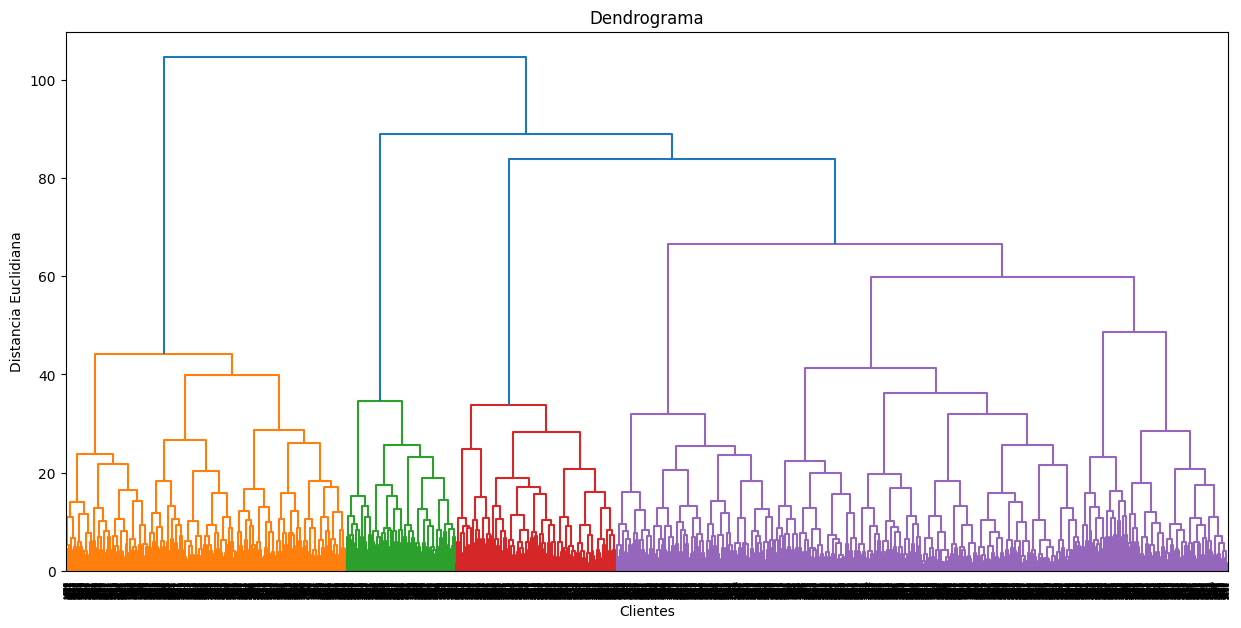

In [11]:
# Calcular las distancias y generar el dendrograma
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


#### Interpretaci√≥n del dendrograma

En el dendrograma podemos observar que un corte natural se forma alrededor de una **distancia euclidiana de 80 a 90**, donde las ramas principales se dividen claramente.

A partir de este punto, se distinguen **5 grandes grupos** antes de que las divisiones se vuelvan m√°s peque√±as y espec√≠ficas.

Por esta raz√≥n, elegimos **n=5 cl√∫steres** para el algoritmo K-means, ya que representa un equilibrio entre granularidad y simplicidad en la segmentaci√≥n.


## Paso 13: K-means con n=5

Aplicaremos el algoritmo K-means para segmentar a los clientes en 5 cl√∫steres.


In [12]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar cu√°ntos clientes hay en cada cl√∫ster
df['Cluster'].value_counts().sort_index()

0     633
1     889
2     865
3    1227
4     386
Name: Cluster, dtype: int64

### Paso 13: Resultados del K-means

El algoritmo K-means clasific√≥ a los clientes en 5 cl√∫steres con la siguiente distribuci√≥n:

- Cl√∫ster 0: 633 clientes
- Cl√∫ster 1: 889 clientes
- Cl√∫ster 2: 865 clientes
- Cl√∫ster 3: 1227 clientes
- Cl√∫ster 4: 386 clientes

Podemos observar que el **cl√∫ster 3 es el m√°s grande** y el **cl√∫ster 4 el m√°s peque√±o**.

A continuaci√≥n, analizaremos las caracter√≠sticas promedio de cada cl√∫ster para entender mejor sus perfiles.


## Paso 14: Interpretaci√≥n de los cl√∫steres

A partir de las medias por cl√∫ster, podemos describir los perfiles as√≠:

### Cl√∫ster 0 (633 clientes)
- Alta proporci√≥n de clientes con **Near_Location (95%)** y **Partner (83%)**.
- Casi todos llegaron con **Promo_friends (99.8%)**.
- Contrato promedio **3 meses**.
- Asistencia semanal moderada: **1.77 clases actuales**.
- **Tasa de cancelaci√≥n: 24.6%**.

üëâ **Perfil:** cliente joven, vive cerca, asociado y referido, participaci√≥n moderada.

---

### Cl√∫ster 1 (889 clientes)
- Vive cerca **(85%)**, pocos asociados **(26%)**, pocos referidos **(5%)**.
- Contrato corto **(2.6 meses)**.
- Alta frecuencia de asistencia actual **(2.73 clases/semana)**.
- **Tasa de cancelaci√≥n m√°s baja: 8.9%**.

üëâ **Perfil:** cliente independiente, no asociado, pero con **alta participaci√≥n y fidelidad**.

---

### Cl√∫ster 2 (865 clientes)
- Alta proporci√≥n de **Near_Location (94%)** y **Partner (74%)**.
- Contratos largos **(11.85 meses)**.
- Muy alta duraci√≥n de contrato restante **(10.8 meses)**.
- Alta asistencia hist√≥rica **(2.0 clases)**.
- **Tasa de cancelaci√≥n muy baja: 2.2%**.

üëâ **Perfil:** **cliente fiel y comprometido**, con contrato largo y participaci√≥n estable.

---

### Cl√∫ster 3 (1227 clientes)
- Menor proporci√≥n de clientes cerca **(71%)** y asociados **(30%)**.
- Contrato muy corto **(1.9 meses)**.
- Baja asistencia actual **(0.97 clases/semana)**.
- **Tasa de cancelaci√≥n m√°s alta: 57.3%**.

üëâ **Perfil:** **cliente en riesgo**, contrato corto, poca asistencia, vive lejos.

---

### Cl√∫ster 4 (386 clientes)
- Vive cerca **(86%)**, asociado medio **(47%)**.
- Contrato promedio **4.8 meses**.
- Asistencia actual **(1.72 clases/semana)**.
- **Tasa de cancelaci√≥n: 26.7%**.

üëâ **Perfil:** cliente promedio, contrato medio, participaci√≥n intermedia, cancelaci√≥n moderada.

---

**Conclusi√≥n general:**
- Cl√∫steres **1 y 2 son los m√°s fieles**.
- Cl√∫ster **3 es el m√°s cr√≠tico**, necesita estrategias de retenci√≥n inmediatas.
- Cl√∫steres **0 y 4 son intermedios**, podr√≠an moverse hacia cancelaci√≥n o retenci√≥n seg√∫n la atenci√≥n recibida.


## Paso 15: Conclusiones y recomendaciones

A partir de los an√°lisis realizados, proponemos las siguientes recomendaciones para mejorar la retenci√≥n de clientes:

### 1. **Enfocar estrategias de retenci√≥n en el cl√∫ster 3**
- Este grupo tiene la **mayor tasa de cancelaci√≥n (57.3%)**, contratos muy cortos y baja asistencia.
- **Acciones sugeridas:**
  - Ofrecer descuentos o incentivos para ampliar la duraci√≥n de sus contratos.
  - Campa√±as de motivaci√≥n para aumentar la asistencia: clases gratuitas, retos de asistencia, seguimiento personalizado.
  - Comunicaciones directas para conocer motivos de baja asistencia.

---

### 2. **Fortalecer el compromiso de los cl√∫steres 0 y 4**
- Ambos tienen tasas de cancelaci√≥n moderadas (~25%).
- Viven cerca y tienen cierta conexi√≥n con la marca (asociados, referidos).
- **Acciones sugeridas:**
  - Programas de fidelidad que premien su gasto adicional o asistencia.
  - Ofrecer planes personalizados para ampliar su contrato.
  - Invitar a actividades grupales o eventos para reforzar el sentido de comunidad.

---

### 3. **Mantener las estrategias actuales en cl√∫steres 1 y 2**
- Estos grupos ya son **altamente fieles (cancelaci√≥n <10%)**.
- Tienen contratos m√°s largos, alta asistencia y buena relaci√≥n con el gimnasio.
- **Acciones sugeridas:**
  - Continuar ofreciendo beneficios exclusivos.
  - Promover recomendaciones o ‚Äútrae a un amigo‚Äù con estos grupos.
  - Evitar cambios que puedan afectar su percepci√≥n positiva.

---

### 4. **Indicadores clave a monitorear**
- Disminuciones en la frecuencia de asistencia mensual son un **indicador temprano de riesgo de cancelaci√≥n**.
- Contratos cortos est√°n **altamente asociados a mayor cancelaci√≥n**.
- Los **clientes referidos y asociados a empresas** tienen menor riesgo de cancelaci√≥n.

‚úÖ Estas acciones permiten priorizar recursos hacia los grupos de mayor riesgo, manteniendo la fidelidad de los m√°s comprometidos y fomentando mejores pr√°cticas de retenci√≥n.



## Conclusi√≥n final

El an√°lisis permiti√≥ identificar patrones claros de comportamiento en los clientes de Model Fitness:

- La **asistencia frecuente**, la **duraci√≥n del contrato** y el **tiempo como cliente** son factores clave para reducir la probabilidad de cancelaci√≥n.
- La **mayor√≠a de las cancelaciones ocurren en clientes j√≥venes, con contratos cortos, menor asistencia y menor antig√ºedad**.
- A trav√©s de la segmentaci√≥n en 5 cl√∫steres, se identificaron grupos con distintos niveles de riesgo y compromiso, lo cual permite dise√±ar estrategias personalizadas de retenci√≥n.
- Las acciones de retenci√≥n deben centrarse en aumentar la permanencia, incentivar la participaci√≥n activa y promover contratos m√°s largos, especialmente en los segmentos m√°s vulnerables.

Implementar estas estrategias no solo reducir√° la tasa de cancelaci√≥n, sino que fortalecer√° la relaci√≥n a largo plazo con los clientes y aumentar√° el valor de vida del cliente (CLV) para el gimnasio.
